# TESTING PROCESS

## Importing Libraries

In [1]:
# warnings module used to avoid basic warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.models import load_model # used to load the trained model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img,img_to_array

## Labels dictionary

In [3]:
class_names = {0:'Benign Masses',1:'Malignant Masses'} # class dictionary (string labels for numerical address)

## Model Loading

In [4]:
# displaying files that we have inside the models folder
import os
os.listdir("models")

['densenet201_model.h5', 'inceptionV3_model.h5', 'Vgg19_model.h5']

In [5]:
#loading all the models

model_inception=load_model("models/inceptionV3_model.h5")
model_densenet=load_model("models/denseNet201_model.h5")
model_vgg=load_model("models/Vgg19_model.h5")

## User Input Image

In [6]:
# user input image filepath

img_path="UserInput/m1.png"

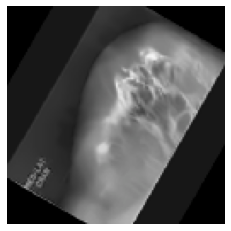

In [7]:
# loading input image and resizing

image=load_img(img_path, color_mode='rgb', target_size=(128,128))
plt.imshow(image)
plt.axis("off")
plt.show()

## Normalization

In [8]:
# performing data normalization

image=img_to_array(image)
image=image/255.0
expand_img = np.expand_dims(image, axis=0)

In [9]:
# performing model prediction for all the models with input image

result_inception = model_inception.predict(expand_img)
result_densenet = model_densenet.predict(expand_img)
result_vgg = model_vgg.predict(expand_img)

In [10]:
print(result_inception)

[[0.19910458 0.7964156 ]]


In [11]:
print(result_densenet)

[[0.19231987 0.80919695]]


In [12]:
print(result_vgg)

[[0.34672317 0.6437775 ]]


In [13]:
inception_result=result_inception[0]
densenet_result=result_densenet[0]
vgg_result=result_vgg[0]

In [14]:
print(inception_result)
print(densenet_result)
print(vgg_result)

[0.19910458 0.7964156 ]
[0.19231987 0.80919695]
[0.34672317 0.6437775 ]


In [15]:
inception_index = int(np.argmax(inception_result))
print(inception_index)

1


In [16]:
densenet_index = int(np.argmax(densenet_result))
print(densenet_index)

1


In [17]:
vgg_index = int(np.argmax(vgg_result))
print(vgg_index)

1


In [18]:
inception_class_label = class_names[inception_index]
print(inception_class_label)

Malignant Masses


In [19]:
densenet_class_label = class_names[densenet_index]
print(densenet_class_label)

Malignant Masses


In [20]:
vgg_class_label = class_names[vgg_index]
print(vgg_class_label)

Malignant Masses


## Ensemble Result

In [21]:
# performing ensemble approach

models = [model_inception, model_densenet, model_vgg]
preds = [model.predict(expand_img) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)
ensemble_prediction = np.argmax(summed, axis=1)

In [22]:
print(ensemble_prediction)

[1]


In [23]:
print(summed)

[[0.7381476 2.2493901]]


In [24]:
# ensemble probability

print("Ensemble Probability Score is {:.2f}%".format(summed[0][ensemble_prediction[0]]))

Ensemble Probability Score is 2.25%


In [25]:
# ensemble output

ensemble_prediction_label = class_names[ensemble_prediction[0]]
print(ensemble_prediction_label)

Malignant Masses


# Thank You....